In [30]:
import warnings
import numpy as np

warnings.simplefilter("ignore", category=np.exceptions.VisibleDeprecationWarning)


In [1]:
!pip install fiftyone PyMaxflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from sklearn.cluster import KMeans
import maxflow
from graph_cut import * 

# Load Image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return image

# Initialize Labels using K-Means
def initialize_labels(image, K=3):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))  # Flatten image to (num_pixels, 3)
    
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)  # Assign labels to pixels
    
    return labels.reshape((h, w))  # Reshape back to image dimensions

def initialize_labels_bis(image, K, method='kmeans'):
    """
    Initialize the segmentation labels.
    
    Args:
        image: Input image (h, w, channels)
        K: Number of labels
        method: 'kmeans' or 'random'
    
    Returns:
        Initial labels (h, w)
    """
    h, w, c = image.shape
    pixels = image.reshape(-1, c)
    
    if method == 'random':
        return np.random.randint(0, K, (h, w))
    elif method == 'kmeans':
        kmeans = KMeans(n_clusters=K, random_state=0).fit(pixels)
        return kmeans.labels_.reshape(h, w)
    else:
        raise ValueError(f"Unknown initialization method: {method}")






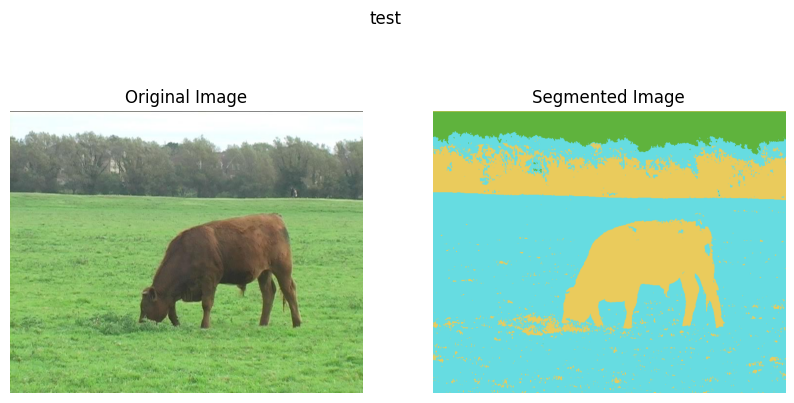

In [47]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="test")


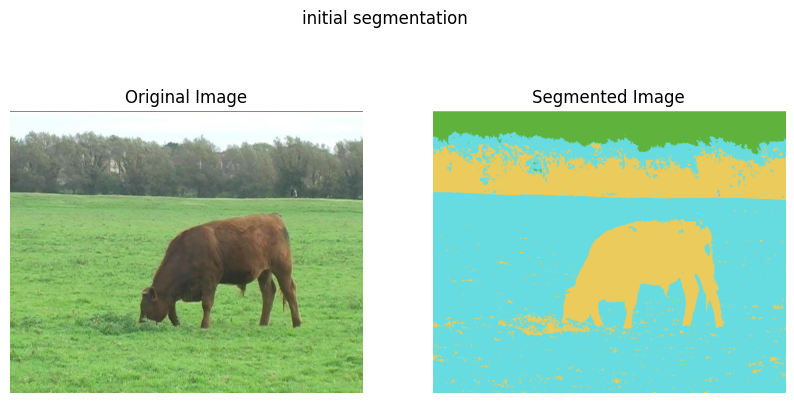

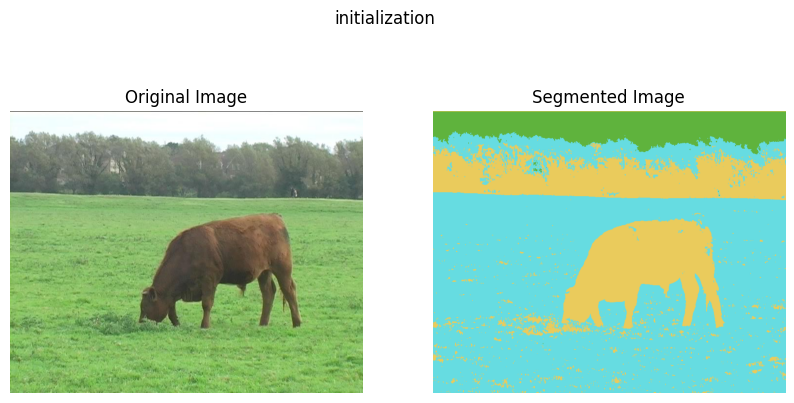

first energy 7634240.529122439
iterations nb: 0
alpha: 0


/tmp/ipykernel_2631898/4223918017.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.add_edge(nodes[pixel_index], aux_node, weight_down, weight_down)
/tmp/ipykernel_2631898/4223918017.py:161: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.add_edge(nodes[neighbor_index_down], aux_node, pairwise[i+1,j,labels[i+1,j],alpha], pairwise[i+1,j,labels[i+1,j],alpha])
/tmp/ipykernel_2631898/4223918017.py:163: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.a

whole graph: [False False False ...  True  True  True]
whole graph: 289854
len of nodes 414720
computed energy 2786160.7390607037 is it greater than initial energy? False


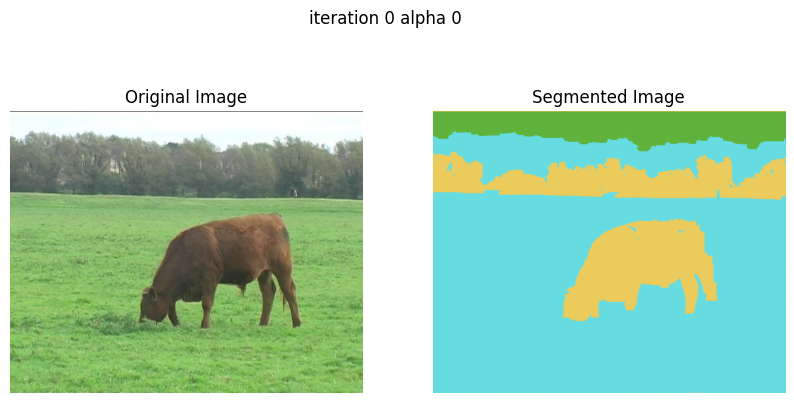

energy 2786160.7390607037
alpha: 1
whole graph: [ True  True  True ... False False False]
whole graph: 42917
len of nodes 414720
computed energy 2643354.7151218965 is it greater than initial energy? False


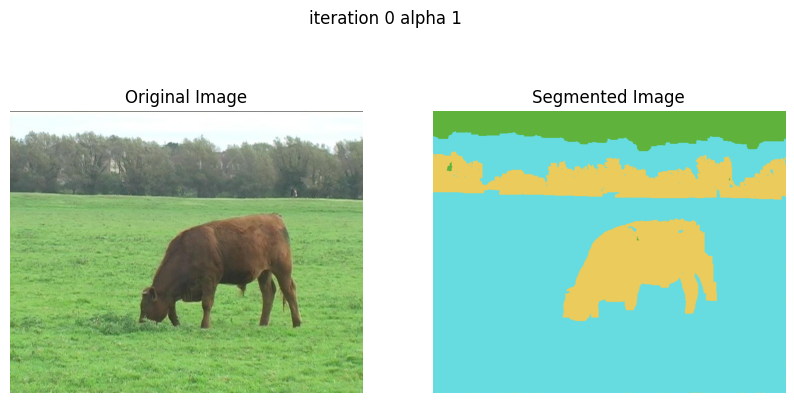

energy 2643354.7151218965
alpha: 2
whole graph: [False False False ... False False False]
whole graph: 97848
len of nodes 414720
computed energy 2247594.858904738 is it greater than initial energy? False


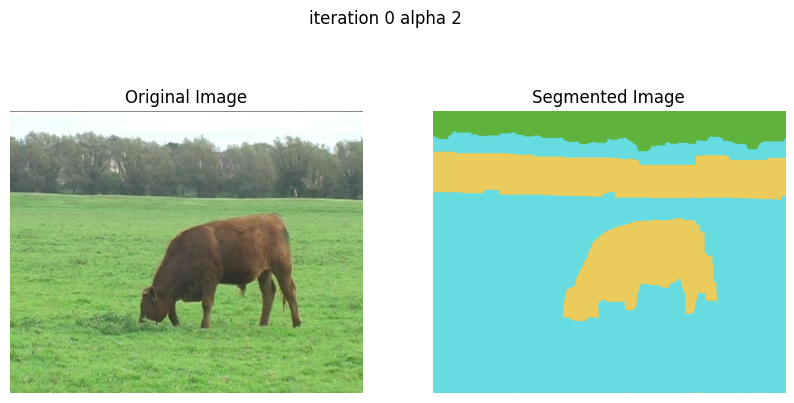

energy 2247594.858904738


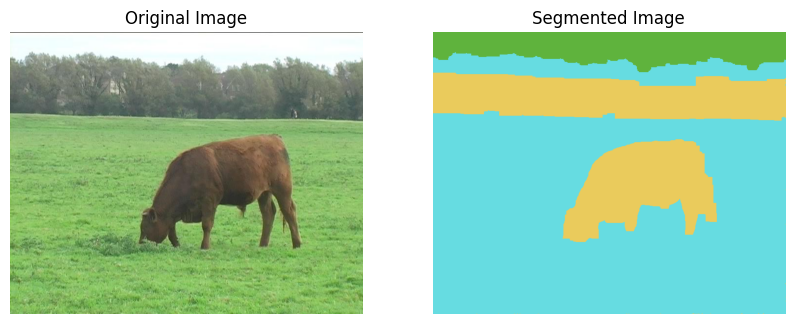

iterations nb: 1
alpha: 0
whole graph: [False False False ...  True  True  True]
whole graph: 274105
len of nodes 414720
computed energy 2247594.858904738 is it greater than initial energy? False


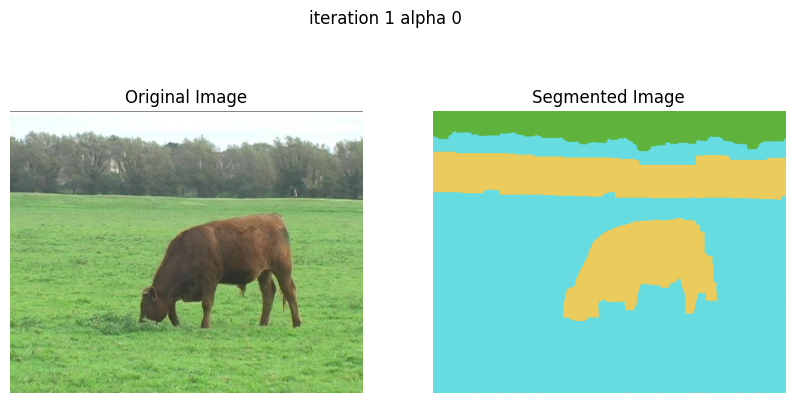

energy 2247594.858904738
alpha: 1
whole graph: [ True  True  True ... False False False]
whole graph: 42767
len of nodes 414720
computed energy 2247594.858904738 is it greater than initial energy? False


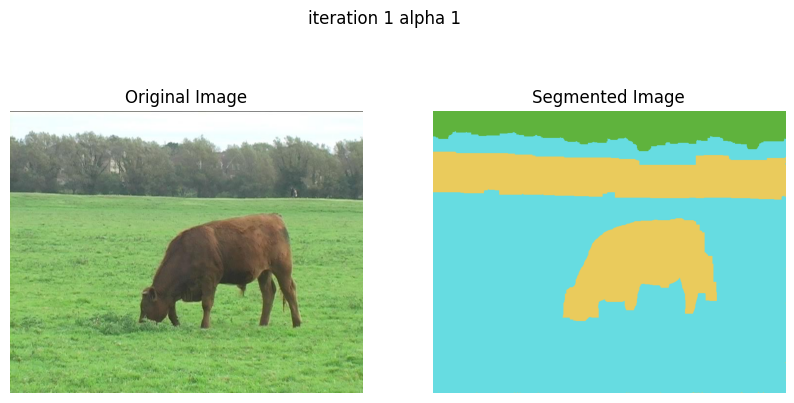

energy 2247594.858904738
alpha: 2
whole graph: [False False False ... False False False]
whole graph: 97848
len of nodes 414720
computed energy 2247594.858904738 is it greater than initial energy? False


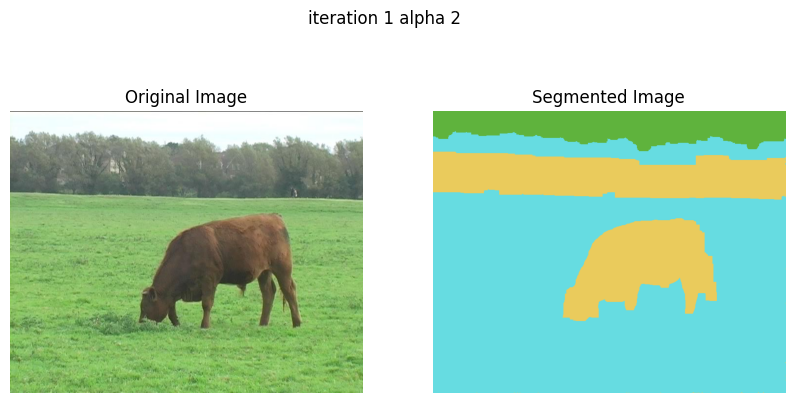

energy 2247594.858904738


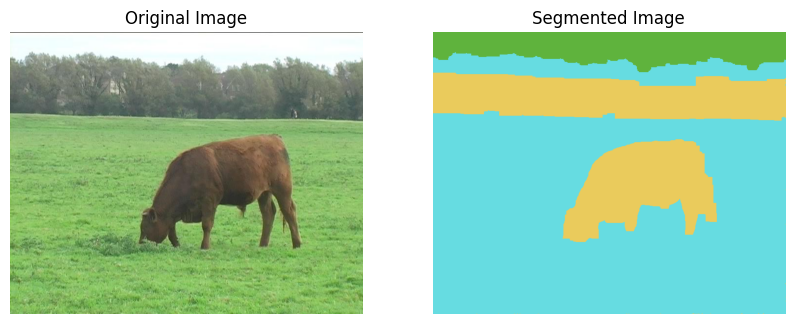

In [48]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="initial segmentation")

histograms = compute_histograms(image, labels, K=K, bins = 16)
unary_term = compute_unary_term(image, labels,histograms, K=K, bins=16)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)
segmented_labels = alpha_expansion(image, unary_term, pairwise_term,method='kmeans', K=K,max_iterations=2)
show_segmentation(image, segmented_labels)

## Other iterations:
Better unary term ? 

In [ ]:
def compute_unary_term(image, labels, histograms, K, bins=16):
    w,h,l=image.shape
    cost=np.zeros((w,h,l))
    for i in range(w):
        for j in range(h):
            for k in range(l):
                cost[i,j,k]=np.linalg.norm(image[i,j]-labels[i])
    return cost
    return unary

In [28]:
#compute the average color of each label
def compute_average_color(image, labels, K):
    average_colors = np.zeros((K, 3))
    for k in range(K):
        mask = (labels == k)
        average_colors[k] = np.mean(image[mask], axis=0)
    return average_colors
label_colors=compute_average_color(image, labels, K)
label_colors

array([[136.3535265 , 181.60845145, 105.89085596],
       [246.41260653, 252.37401511, 251.73980658],
       [ 94.00294385,  99.53205735,  80.54740811]])

In [24]:
image.shape

(576, 720, 3)

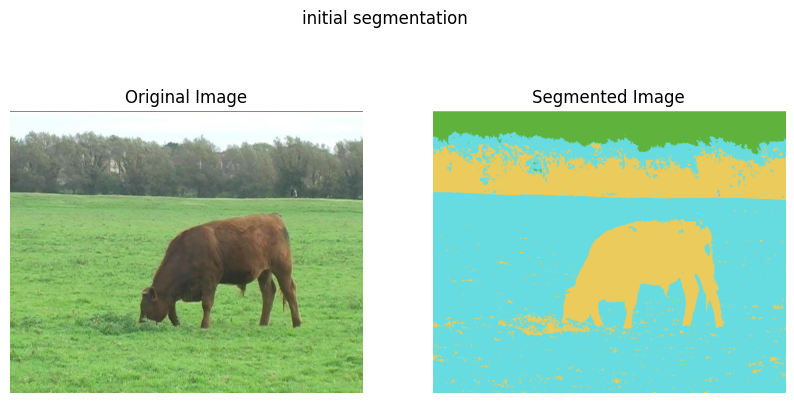

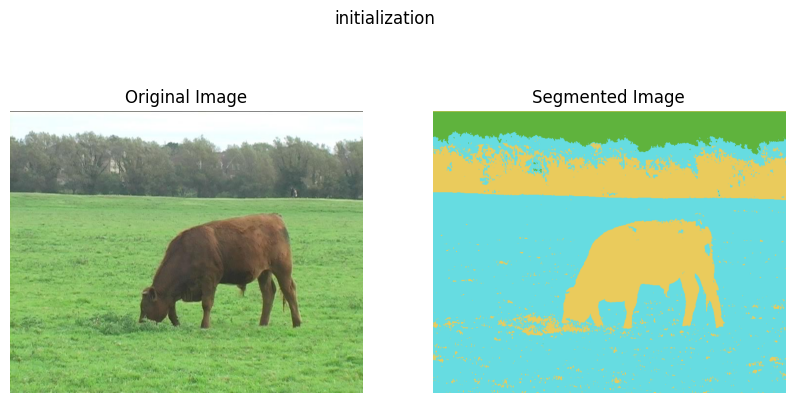

first energy 10792889.314208316
iterations nb: 0
alpha: 0


/tmp/ipykernel_2631898/4249140037.py:159: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.add_edge(nodes[pixel_index], aux_node, weight_down, weight_down)
/tmp/ipykernel_2631898/4249140037.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.add_edge(nodes[neighbor_index_down], aux_node, pairwise[i+1,j,labels[i+1,j],alpha], pairwise[i+1,j,labels[i+1,j],alpha])
/tmp/ipykernel_2631898/4249140037.py:162: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  graph.a

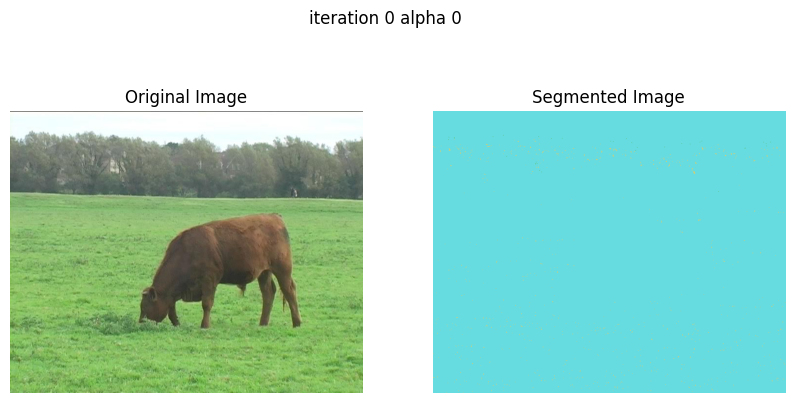

energy 25475249.452209976
alpha: 1


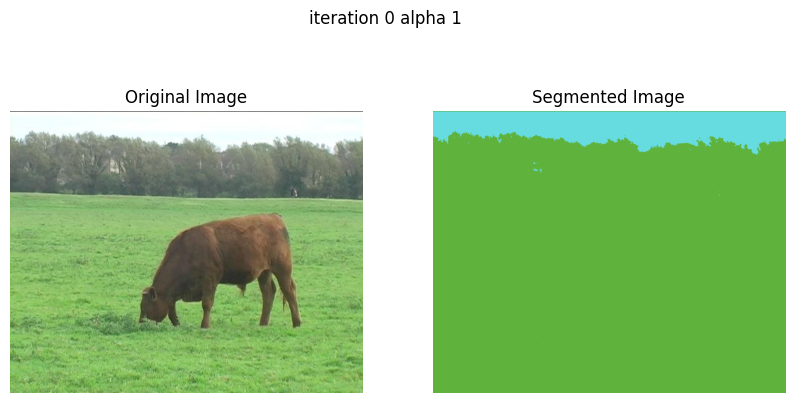

energy 90135947.56187437
alpha: 2


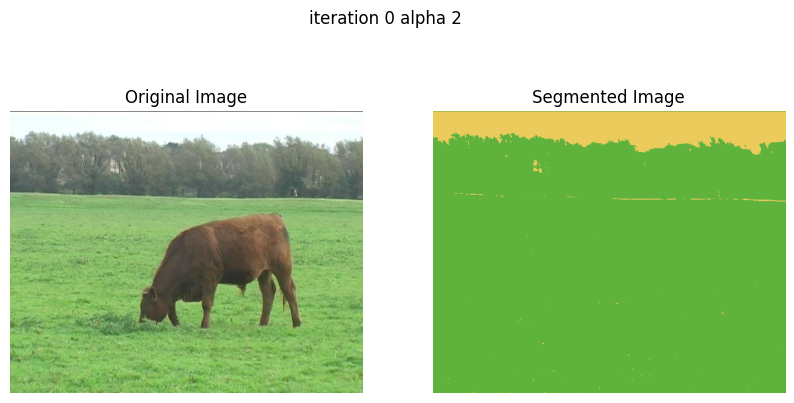

energy 93695322.69637516


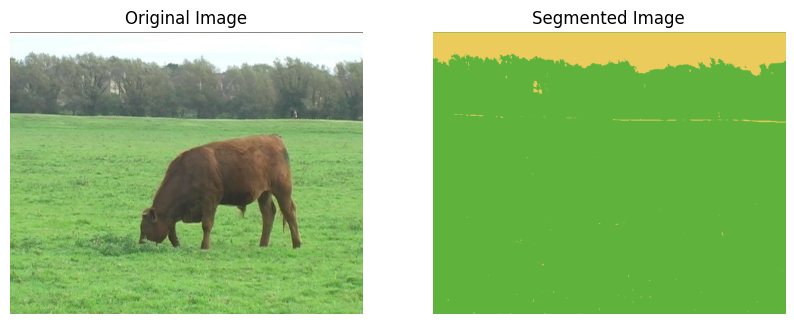

iterations nb: 1
alpha: 0


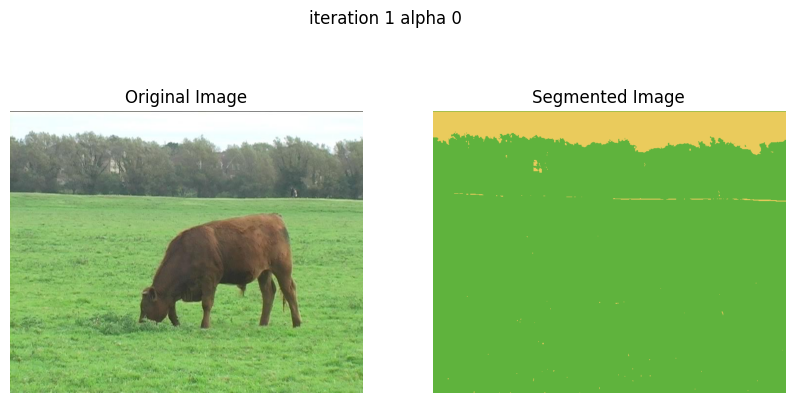

energy 93695322.69637516
alpha: 1


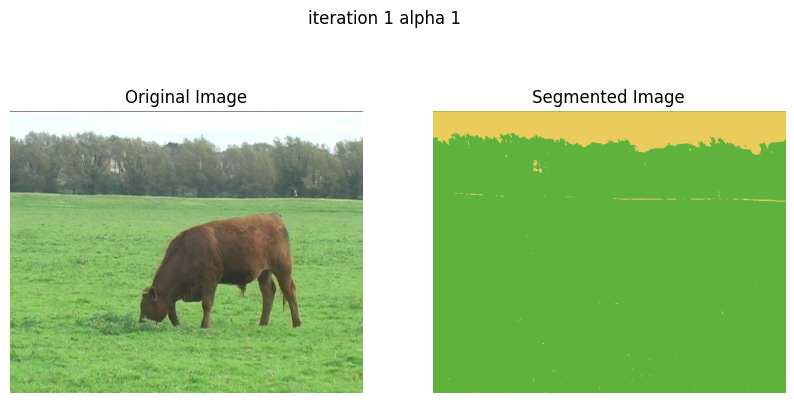

energy 93695322.69637516
alpha: 2


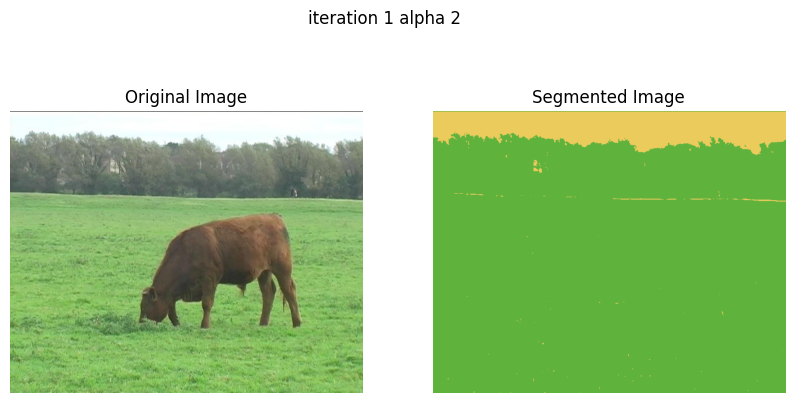

energy 93695322.69637516


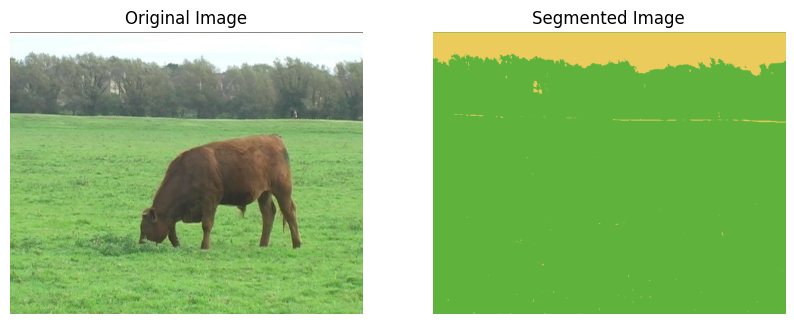

In [29]:
image_path = "images/cow.ppm"  # Replace with actual image path
K=3
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method='kmeans')
show_segmentation(image, labels,title="initial segmentation")

histograms = compute_histograms(image, labels, K=K, bins = 16)
unary_term = compute_unary_term(image, label_colors,histograms, K=K, bins=16)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=5)
segmented_labels = alpha_expansion(image, unary_term, pairwise_term,method='kmeans', K=K,max_iterations=2)
show_segmentation(image, segmented_labels)